In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
from glob import glob

# core nltk
import nltk
from nltk.tokenize import word_tokenize

# gensim magic
import gensim
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [18]:
# load saved models
crown_models = dict()
input_data = ["../models/crown-henry.w2v",
              "../models/crown-edward.w2v",
              "../models/crown-mary.w2v",
              "../models/crown-elizabeth.w2v",
              "../models/crown-james.w2v",
              "../models/crown-charles.w2v"]

for fp in input_data:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))

    crown_models[model_name] = KeyedVectors.load(fp,mmap='r')

starting: crown-henry
starting: crown-edward
starting: crown-mary
starting: crown-elizabeth
starting: crown-james
starting: crown-charles


In [21]:
# select two terms
terms=["church","god"]

labels=[x.replace("crown-","") for x in crown_models.keys()]
d = list()
for model in crown_models.keys():
    d.append(crown_models[model].distance(terms[0],terms[1]))

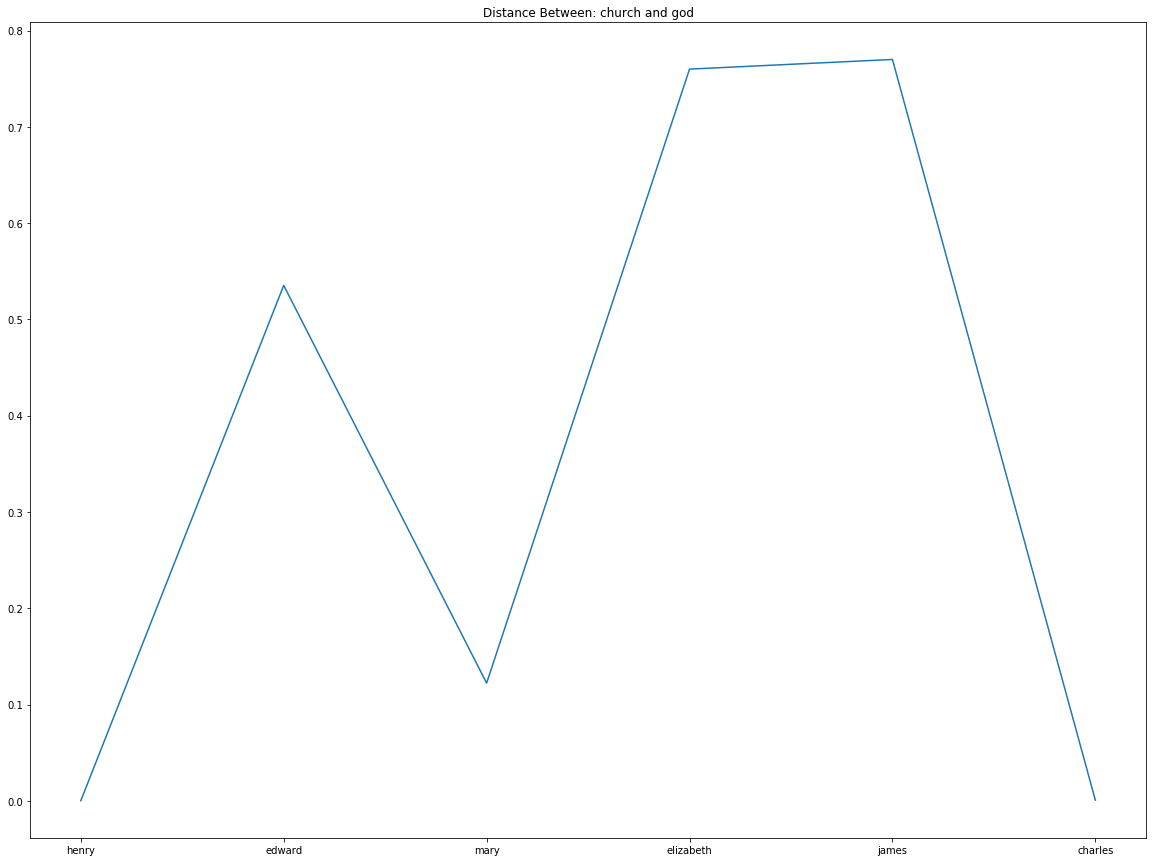

In [22]:
fig = plt.figure(figsize=(20, 15))
y = np.arange(len(d))
plt.plot(y,d)
plt.xticks(np.arange(len(labels)),labels)
plt.title("Distance Between: {0} and {1}".format(terms[0],terms[1]))
plt.show()